# Prosper Loan Data:
## Data Wrangling and Visualisation Practice

by Sejung Jenn Chun

Outline:
The focus of this analysis is finding factors impacting loan outcome status. The dataset contains 113,937 loan entries with 81 variables, including credit grading, prosper rating, loan original amount, borrowers' employment state, etc. More detailed explanation of each features could be found here: link.

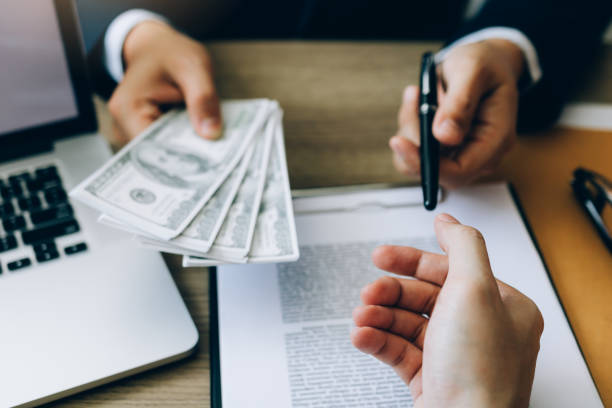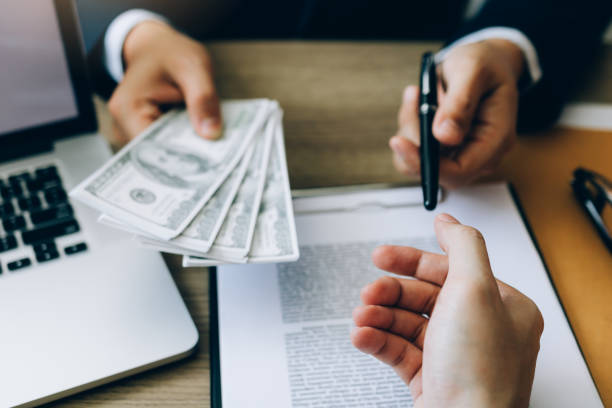

In [1]:
# import necessary libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 
import os 

## 1. GATHER

In [2]:
loan_data = pd.read_csv(r"../input/prosper-loan-dataset/prosperLoanData.csv")
loan_data.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


## 2. ASSESS & REPORT
As the volume of the dataset is big, assessment and cleaning process will be iterative throughout the process.

In [3]:
# Run the code below to see all rows and columns, not collapsed
pd.options.display.max_rows = None
pd.options.display.max_columns = None

# High-level assessment of the datadset
print(loan_data.shape),
print(loan_data.info())

(113937, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  

In [ ]:
# Check for any duplicate 
loan_data.duplicated().sum()

> It seems like there is no duplicate. However, let's check if there is hidden duplicates by checking .duplicated() by `listingkey` column

In [4]:
# Check for duplicates by 'listingkey' 
loan_data[loan_data['ListingKey'].duplicated()].shape[0]

871

In [5]:
# Evaluate the first three duplicates and see whether we could leave or delete them
loan_data.query("ListingKey == '0F043596202561788EA13D5' or ListingKey == '0A0635972629771021E38F3' or ListingKey =='2D2635984503681189056B4'")

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,0.05221,0.0099,0.04231,7.0,AA,9.0,7,IL,Food Service,Employed,269.0,True,False,NaN,2013-12-02 10:43:39,820.0,839.0,1993-04-01 00:00:00,17.0,16.0,32.0,12,219.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,9906.0,0.11,77696.0,29.0,1.00,1.0,0.25,"$25,000-49,999",True,3333.333333,02163700809231365A56A1C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,3,121268,10000,2013-12-12 00:00:00,Q4 2013,49A53699682291323D04D66,305.54,611.08,505.58,105.5,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,0.05221,0.0099,0.04231,7.0,AA,11.0,7,IL,Food Service,Employed,269.0,True,False,NaN,2013-12-02 10:43:39,820.0,839.0,1993-04-01 00:00:00,17.0,16.0,32.0,12,219.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,9906.0,0.11,77696.0,29.0,1.00,1.0,0.25,"$25,000-49,999",True,3333.333333,02163700809231365A56A1C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,3,121268,10000,2013-12-12 00:00:00,Q4 2013,49A53699682291323D04D66,305.54,611.08,505.58,105.5,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
998,0A0635972629771021E38F3,1055932,2013-12-18 14:25:17.053000000,NaN,60,Current,NaN,0.17710,0.1535,0.1435,0.13507,0.0599,0.07517,5.0,B,6.0,1,MD,Other,Employed,100.0,True,False,NaN,2014-02-08 11:39:13,760.0,779.0,1994-11-01 00:00:00,16.0,16.0,34.0,15,623.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,8028.0,0.27,14190.0,32.0,0.96,1.0,0.35,"$25,000-49,999",True,3750.000000,CB643706582969191E8C26B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,1,132043,10000,2014-02-12 00:00:00,Q1 2014,98A937006186534818378B9,239.74,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
999,0A0635972629771021E38F3,1055932,2013-12-18 14:25:17.053000000,NaN,60,Current,NaN,0.17710,0.1535,0.1435,0.13507,0.0599,0.07517,5.0,B,7.0,1,MD,Other,Employed,100.0,True,False,NaN,2014-02-08 11:39:13,760.0,779.0,1994-11-01 00:00:00,16.0,16.0,34.0,15,623.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,8028.0,0.27,14190.0,32.0,0.96,1.0,0.35,"$25,000-49,999",True,3750.000000,CB643706582969191E8C26B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,1,132043,10000,2014-02-12 00:00:00,Q1 2014,98A937006186534818378B9,239.74,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
1554,2D2635984503681189056B4,1097584,2014-01-11 07:50:08.037000000,NaN,60,Current,NaN,0.14528,0.1224,0.1124,0.10731,0.0424,0.06491,5.0,B,9.0,1,NJ,Police Officer/Correction Officer,Employed,107.0,

> If you look at duplicated entries by ListingKey, we can see each duplicates are talking about same loans. If you look at the loan (listingkey: 0F043596202561788EA13D5), creation-date is same with all the other variables same, except for the prosper-score. We can assume these two rows are indicating the same loan case but with error. If is safe to delete all these duplicated rows as we cannot assume borrowers' loan data/variables arbitrarily. Thus, we delete all rows with duplicated ListingKey in the cleaning section.

## 3. CLEANING
This section will clean the dataset for its tidiness and quality.

Quality
* Duplicated entries
* Nan entries <br>
c.f. Some entries have null values in nature which cannot be fixed.
For example, `closeddate` can only be collected for certain loan status such as cancelled, completed, chargedoff loan status
* Wrong datatypes
* Object columns to ordered-categorical column
* `listingcategory (numeric)` to string categorical data
* Too complicated/long column names

Tidiness
* Too many information in one observational unit
* Column name inconsistencies 

In [6]:
# Before any cleaning, make a copy of the original dataset
df = loan_data.copy()

# Standardise column capitalisation to .lower()
df.columns = df.columns.str.lower()

In [9]:
# Drop duplicated rows by getting index 
df.drop_duplicates(subset = 'loankey', inplace = True)

# Confirm. You should get False
df.listingkey.duplicated().any()

False

In [10]:
# Create a new dataframe only with columns of interest
cols = ['listingcreationdate', 'creditgrade', 'term', 'loanstatus', 'borrowerapr', 'borrowerrate', 'prosperrating (numeric)', 
        'prosperrating (alpha)', 'listingcategory (numeric)', 'borrowerstate', 'employmentstatus', 'amountdelinquent', 'incomerange',
        'loanoriginalamount']
df = df.loc[:, cols]
df.head(1)

,listingcreationdate,creditgrade,term,loanstatus,borrowerapr,borrowerrate,prosperrating (numeric),prosperrating (alpha),listingcategory (numeric),borrowerstate,employmentstatus,amountdelinquent,incomerange,loanoriginalamount
0,2007-08-26 19:09:29.263000000,C,36,Completed,0.16516,0.158,NaN,NaN,0,CO,Self-employed,472.0,"$25,000-49,999",9425


In [11]:
# Rename columns 
df.rename(columns = {'listingcreationdate': 'listingdate',
                     'prosperrating (numeric)': 'prosperrating_n', 
                    'prosperrating (alpha)': 'prosperrating_a',
                    'listingcategory (numeric)': 'listing_cat', 
                    'amountdelinquent': 'amount_delin', 
                    'loanoriginalamount': 'original_amount',
                    'employmentstatus': 'employment'}, inplace = True)

In [12]:
# Convert datatypes
df['listingdate'] = pd.to_datetime(df['listingdate']).dt.normalize()

df['borrowerstate'] = df['borrowerstate'].astype('category')

# Code below causes an error. NA's cannot be stored in integer arrays. Either fill them with some value or drop.
# df['prosperrating_n'] = df['prosperrating_n'].astype('int64')

In [13]:
# Convert to ordered-categorical columns
ordinal_var_dict = {'creditgrade': ['NC', 'HR', 'E', 'D', 'C', 'B', 'A', 'AA'],
                    'prosperrating_a': ['HR', 'E', 'D', 'C', 'B', 'A', 'AA'],
                    'prosperrating_n': [7.0, 6.0, 5.0, 4.0, 3.0, 2.0, 1.0],
                    'incomerange': ['Not displayed', 'Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']}
    
for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)

In [14]:
# Replace numeric information to actual listing categories
df.replace({'listing_cat': 
            {0: 'Not available', 1: 'Debt consolidation', 2: 'Home improvement', 3: 'Business', 4: 'Personal loan', 
           5: 'Student use', 6: 'Auto', 7: 'Other', 8: 'Baby and adoption', 9: 'Boat', 10: 'Cosmetic procedure',
           11: 'Engagement ring', 12: 'Green laons', 13: 'Household expenses', 14: 'Large purchases', 15: 'Medical or dental', 
           16: 'Motorcycle', 17: 'RV', 18: 'Taxes', 19: 'Vacation', 20: 'Wedding loans'}}, inplace = True)

In [15]:
# Confirm
print(df.info()),
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113066 entries, 0 to 113936
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   listingdate      113066 non-null  datetime64[ns]
 1   creditgrade      28953 non-null   category      
 2   term             113066 non-null  int64         
 3   loanstatus       113066 non-null  object        
 4   borrowerapr      113041 non-null  float64       
 5   borrowerrate     113066 non-null  float64       
 6   prosperrating_n  83982 non-null   category      
 7   prosperrating_a  83982 non-null   category      
 8   listing_cat      113066 non-null  object        
 9   borrowerstate    107551 non-null  category      
 10  employment       110811 non-null  object        
 11  amount_delin     105444 non-null  float64       
 12  incomerange      113066 non-null  category      
 13  original_amount  113066 non-null  int64         
dtypes: category(5), date

In [13]:
# Optional to save the cleaned data 
path = r"C:\\Users\\sjchu\\Downloads\\"
df.to_csv(os.path.join(path, r'df.csv'), index = False)

<b>Structure of dataset:</b>
After initial cleaning process, the dataset contains 113,937 rows and 22 columns. Data types of columns include datetime, numerical, and non-numeric variables (e.g. categorical, nominal, ordinal).

<b>Main interest in dataset:</b>
This project will focus on 

<b>What features in the dataset do you think will help support your investigation into your feature(s) of interest?</b>

## 4. Visualisation
### 1) Univariate
This section will focus on univariate visualisation of some columns to see mainly distribution / frequencies of values.

In [16]:
# Set the color theme and seaborn style for later use
basic = sns.color_palette()[0]
sns.set_style('white')


Credit Grade and Prosper Rating

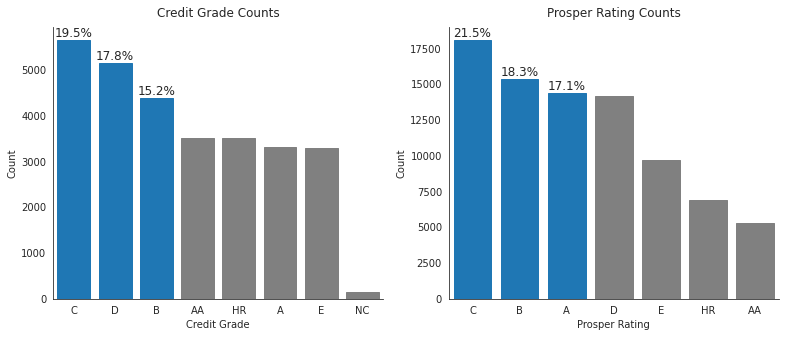

In [17]:
fig, ax = plt.subplots(ncols = 2, figsize = [13, 5], sharey = False)

# Plot the first ax for 'creditgrade'
order1 = df.creditgrade.value_counts().index
sns.countplot(data = df, x = 'creditgrade', order = order1, ax = ax[0])
ax[0].set_title('Credit Grade Counts', pad = 10)
ax[0].set_xlabel('Credit Grade')
ax[0].set_ylabel('Count')

# Add annotation 
for p in ax[0].patches[:3]:
    total = df.creditgrade.count()
    percentage = "{:.1f}%".format(100*p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax[0].annotate(percentage, (x, y), fontsize = 12, ha = 'center', va = 'bottom')
    sns.despine()
# Highlight certain bars 
for bar in ax[0].patches: 
    if bar.get_height() > 4000:
        bar.set_color(basic)
    else:
        bar.set_color('grey')
    
# Plot the second ax for 'prosperrating'
order2 = df.prosperrating_a.value_counts().index 
sns.countplot(data = df, x = 'prosperrating_a', order = order2, ax = ax[1])
ax[1].set_title('Prosper Rating Counts', pad = 10)
ax[1].set_xlabel('Prosper Rating')
ax[1].set_ylabel('Count')

for p in ax[1].patches[:3]:
    total = df.prosperrating_a.count()
    percentage = "{:.1f}%".format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax[1].annotate(percentage, (x, y), fontsize = 12, ha = 'center', va ='bottom')
    sns.despine()
    
for bar in ax[1].patches:
    if bar.get_height() > 14299:
        bar.set_color(basic)
    else:
        bar.set_color('grey')
        
plt.show();

> One can see that 'C' is the most frequent rating in both credit grade and prosper rating system. In credit grade system, C grade is followed by 'D' and 'B'. Together, they occupy more than 50% of the total grade given to the borrowers. Meanwhile, in the prosper rating system, 'C' 'B' and 'A' takes up more than half of the ratings given to the borrowers.

Loan Term 

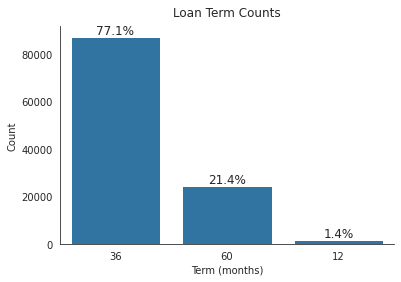

In [18]:
term_order = df.term.value_counts().index

ax = sns.countplot(data = df, x = 'term', color = basic, order = term_order)
ax.set_title("Loan Term Counts", pad = 10)
ax.set_xlabel('Term (months)')
ax.set_ylabel('Count')

for p in ax.patches:
    total = df.term.count()
    percentage = "{:.1f}%".format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), fontsize = 12, ha = 'center', va = 'bottom')
    sns.despine()

plt.show();

> The distribution of loan term shows that the 36-month type represents about 80% of the dataset, making it the most popular one. This is followed by 60-month term (21.4%) and then 12-month (1.4%). 

Loan Status

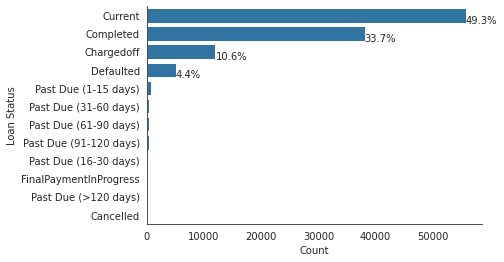

In [21]:
ax = sns.countplot(data = df, y = 'loanstatus', order = df.loanstatus.value_counts().index, 
                    color = basic)

# Annotate top 4 bars
a = 0
for p in ax.patches:
    if a < 4: # while 문이 아니라 if 로
        total = len(df.loanstatus)
        percentage = "{:.1f}%".format(100 * p.get_width() / total)
        x = p.get_x() + p.get_width()
        y = (p.get_y() + p.get_height())
        ax.annotate(percentage, (x, y))
        a += 1

plt.ylabel('Loan Status')
plt.xlabel('Count')
sns.despine()

plt.show();


> The graph shows that 'current' loan status is the most common status (49.3%). This is followed by 'completed' status (33.7%). There is a significant gap between these two status and the rest. Especially, past due (x days) or cancelled statuses are negligible.

BorrowerAPR

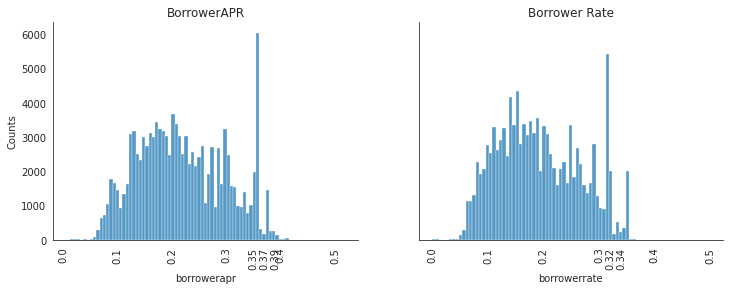

In [22]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = [12, 4], sharey = True)

# BorrowerAPR
apr_bins = np.arange(df.borrowerapr.min(), df.borrowerapr.max() + 0.006, 0.006)
sns.histplot(data = df, x = 'borrowerapr', bins = apr_bins, ax = ax1)
# To see where exactly the peak is
apr_xticks = [0.0, 0.1, 0.2, 0.3, 0.35, 0.37, 0.39, 0.4, 0.5]
ax1.set_xticks(apr_xticks, apr_xticks, rotation = 90)
ax1.set_title('BorrowerAPR')
ax1.set_ylabel('Counts')

# Borrower Rate
rate_bins = np.arange(df.borrowerrate.min(), df.borrowerrate.max() + 0.006, 0.006)
sns.histplot(data = df, x = 'borrowerrate', bins = rate_bins, ax = ax2)
# To see where exactly the peak is
rate_xticks = [0.0, 0.1, 0.2, 0.3, 0.32, 0.34, 0.4, 0.5]
ax2.set_xticks(rate_xticks, rate_xticks, rotation = 90)
ax2.set_title('Borrower Rate')

sns.despine()
plt.show();

> The distribution of both borrowerAPR and borrowerRate is almost identical with a noticeable peak within the range of [0.32, 0.37). High-correlation is expected of course. They both are slightly right-skewed.

Listing Category

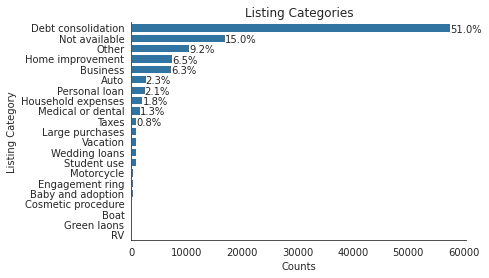

In [23]:
order = df.listing_cat.value_counts().index

ax = sns.countplot(data = df, y = 'listing_cat', order = order, color = basic)
plt.title("Listing Categories")
plt.ylabel("Listing Category")
plt.xlabel("Counts")

# Add annotation to top 10 bars only
a = 0
for p in ax.patches:
    if a < 10:
        total = len(df.listing_cat)
        percentage = "{:.1f}%".format(100*p.get_width() / total)
        x = p.get_width()
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y))
        a += 1

sns.despine()
plt.show();    

> Out of listing categories, debt consolidation occupies about half of the whole counts. This is followed by home improvement, except listing category 'not available' or not specified. 

Borrower State

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


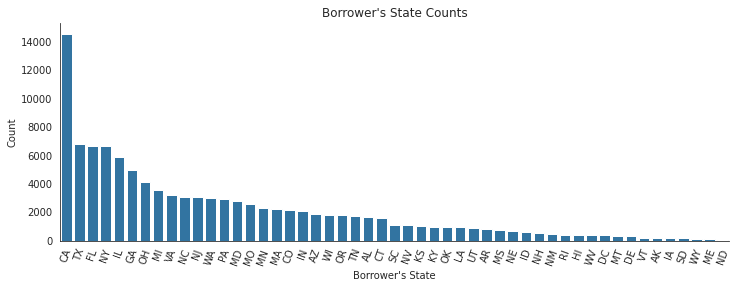

In [24]:
order = df.borrowerstate.value_counts().index
plt.figure(figsize = [12,4])
sns.countplot(df['borrowerstate'], order = order, color = basic)
plt.xticks(rotation = 70)
plt.xlabel('Borrower\'s State')
plt.ylabel('Count')
plt.title('Borrower\'s State Counts')

sns.despine()
plt.show();

> California has significantly larger counts of borrowers with over 14,000 counts. Texas, Florida and NewYork is next in line. It might be interesting to see how these most loan-heated states differ in their completed-default loan ratio.

Borrower Employment Status

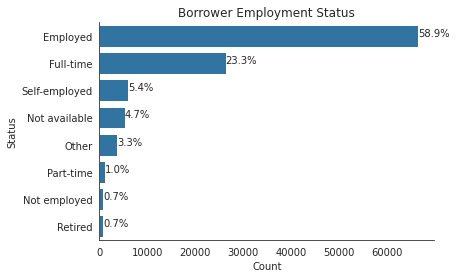

In [27]:
order = df.employment.value_counts().index

ax = sns.countplot(y = df['employment'], color = basic, order = order)
plt.title("Borrower Employment Status")
plt.xlabel("Count")
plt.ylabel("Status")
for p in ax.patches:
    total = len(df.employment)
    percentage = "{:.1f}%".format(100 * p.get_width() / total)
    x = p.get_x() + p.get_width()
    y = p.get_y() + p.get_height()/2
    ax.annotate(percentage, (x, y))
    
    
sns.despine()
plt.show();

> The chart indicates that 'employed' is the most common employment status of the borrowers (58.9%) and full-time being next (23.3%).

Delinquency Amount

<AxesSubplot:>

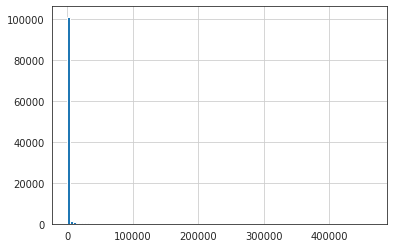

In [28]:
df.amount_delin.hist(bins = 100)

> The amount of delinquencies are extraordinarily right-skewed. Therefore, we apply log transformation.

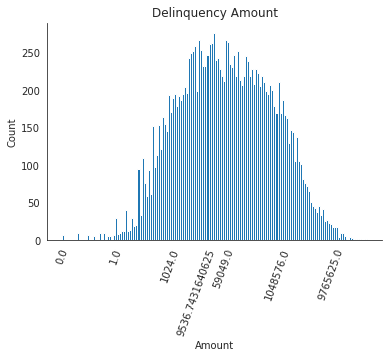

In [31]:
# Create a temporary table for delinquency amount great than 0
# numpy log function cannot transform 0 or negative number
ind1 = df[df["amount_delin"].isnull()].index
ind2 = df[df["amount_delin"] == 0].index 

delin_df = df.drop(ind1)
delin_df = delin_df.drop(ind2)

# Create visualisation again
plt.hist(x = np.log10(delin_df['amount_delin']), bins = 150)
delin_xticks = np.power([0, 1, 2, 2.5, 3, 4, 5], 10)
plt.xticks([0, 1, 2, 2.5, 3, 4, 5], delin_xticks, rotation = 70)
plt.title("Delinquency Amount")
plt.xlabel("Amount")
plt.ylabel("Count")

sns.despine()
plt.show();

# TypeError: 'tuple' object is not callable. This is when we try to call a tuple as if it were a function. 

> Delinquncy amount is heavily right-skewed. When logarithmic transformation applied, it shows a rough normal distribution with the most frequncy around $9636.7. 

Income Range

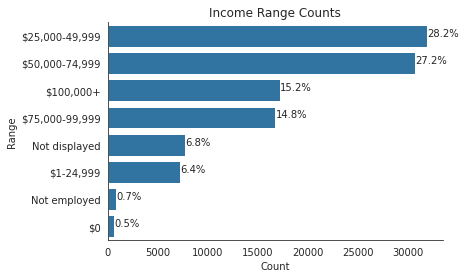

In [33]:
order = df.incomerange.value_counts().index 

ax = sns.countplot(y = df['incomerange'], color = basic, order = order)
sns.despine()
plt.title("Income Range Counts")
plt.ylabel("Range")
plt.xlabel('Count')

for p in ax.patches:
    total = len(df.incomerange)
    percentage = "{:.1f}%".format(p.get_width() / total * 100)
    x = p.get_x() + p.get_width()
    y = p.get_y() + p.get_height()/2
    ax.annotate(percentage, (x, y))

plt.show();

> The income range 25,000 - 49,999 and 50,000 - 74,999 is the most common with 28.2% and 27.2%, respectively.

Loan Original Amount

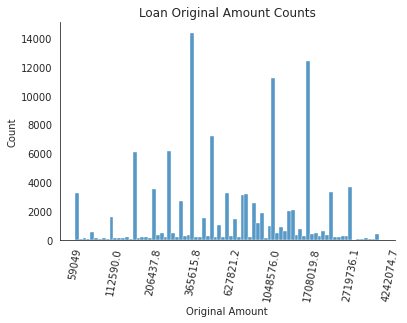

In [35]:
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(x, 10)

sns.histplot(data = df, x = df['original_amount'].apply(log_trans))
or_ticks = [3, 3.2, 3.4, 3.6, 3.8, 4.0, 4.2, 4.4, 4.6]
plt.xticks(or_ticks, [round(log_trans(v, inverse=True),1) for v in or_ticks],
            rotation = 80)

plt.title("Loan Original Amount Counts")
plt.xlabel("Original Amount")
sns.despine()
plt.show();

> Given the certain spikes and steep fall behind, it seems like there are industry standard when it come to loan amount. 